<a href="https://colab.research.google.com/github/msiplab/EicEngLabIV/blob/master/example01_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 実験Ⅳ－１　線形単回帰モデル

新潟大学工学部工学科　電子情報通信プログラム 

## 準備

In [1]:
!pip install japanize-matplotlib
%matplotlib inline

import warnings
warnings.simplefilter('ignore') #警告を無視（コメントアウト推奨）

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib #日本語化matplotlib
sns.set(font="IPAexGothic") #日本語フォント設定


     |████████████████████████████████| 4.1MB 3.4MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120191 sha256=0b24904f893c4ab2911a29b0bc6b357849302e87004e9aa8cca0603e38d80c3c
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


In [2]:
def load_voltage(current):
  """
  電源モデル
  出力電流と負荷電圧の関係
  """
  # 電源電圧
  source_voltage = 24 # [V]
  # 内部抵抗
  internal_register = 2 # [Ω]
  # 負荷電圧
  return source_voltage - internal_register * current

## 観測データ（ノイズなし）

In [3]:
# 観測点数
nSamples = 2
# 出力電流
current_observations = np.random.rand(nSamples)

# 負荷電圧
load_voltages = load_voltage(current_observations)



## 散布図の表示


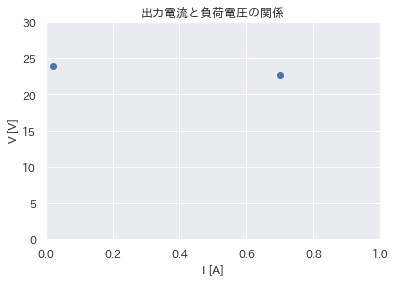

In [4]:
#散布図の表示
fig, ax = plt.subplots()
ax.scatter(current_observations,load_voltages)
ax.set_title("出力電流と負荷電圧の関係")
ax.set_xlabel("I [A]")
ax.set_ylabel("V [V]")
ax.set_xlim([0,1])
ax.set_ylim([0,30])
ax.grid(True)
plt.show()

## 電源電圧 $E$ と内部抵抗 $r$ の解

連立方程式は、Numpy ライブラリにある linalg.solve で解くことができる。

データセット$\{(\mathrm{I}_1,\mathrm{V}_1),(\mathrm{I}_2,\mathrm{V}_2)\}$より，

$\left(\begin{array}{l}E \\ r\end{array}\right)=\left(\begin{array}{ll}1 & -\mathrm{I}_{1} \\ 1 & -\mathrm{I}_{2}\end{array}\right)^{-1}\left(\begin{array}{l}\mathrm{V}_{1} \\ \mathrm{V}_{2}\end{array}\right)$

In [5]:
X = np.array([[1., -current_observations[0]],
              [1., -current_observations[1]]])
y = load_voltages
beta = np.linalg.solve(X, y)

print("電源電圧 E = {0:5.2f} [V]".format(beta[0]))
print("内部抵抗 r = {0:5.2f} [Ω]".format(beta[1]))

電源電圧 E = 24.00 [V]
内部抵抗 r =  2.00 [Ω]


# 観測データ（ノイズあり）

In [6]:
# 観測点数
nSamples = 8
# 出力電流
current_observations = np.random.rand(nSamples)
# 観測誤差
nsigma = 0.5
noise = nsigma*np.random.randn(nSamples)
# 負荷電圧
load_voltages = load_voltage(current_observations)+noise
#観測データの表
dataset = pd.DataFrame({'I[A]':current_observations,
                        'V[V]':load_voltages})
dataset.index += 1 # インデックスを1から付与
display(dataset)

,I[A],V[V]
1,0.162776,23.708768
2,0.039930,24.282069
3,0.080592,23.688574
4,0.106663,24.889348
5,0.767618,21.766608
6,0.391813,23.138862
7,0.881034,22.974510
8,0.791754,21.834325


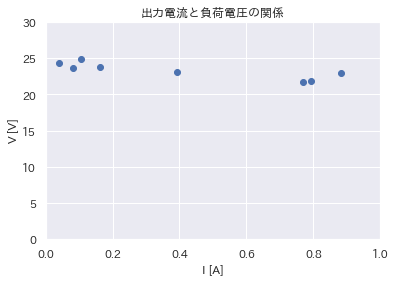

In [7]:
#散布図の表示
fig, ax = plt.subplots()
ax.scatter(current_observations,load_voltages)
ax.set_title("出力電流と負荷電圧の関係")
ax.set_xlabel("I [A]")
ax.set_ylabel("V [V]")
ax.set_xlim([0,1])
ax.set_ylim([0,30])
ax.grid(True)
plt.show()

## 電源電圧 $E$ と内部抵抗 $r$ の推定

線形単回帰分析は、Scikit-learn ライブラリにあるsklearn.linear_model で計算できる。

$\left(\begin{array}{c}
\hat{E} \\
\widehat{r}
\end{array}\right)=\left(\begin{array}{cc}
N & \sum_{i=1}^{N} I_{i} \\
\sum_{i=1}^{N} I_{i} & \sum_{i=1}^{N} I_{i}^{2}
\end{array}\right)^{-1}\left(\begin{array}{c}\sum_{i=1}^{N} V_{i}\\\sum_{i=1}^{N} I_iV_{i}\end{array}\right)=\left(\mathbf{X} \mathbf{X}^{T}\right)^{-1} \mathbf{X}^{T} \mathbf{y}=\mathbf{X}^{+} \mathbf{y}$

ただし、

$\mathbf{X}=\left(\begin{array}{cc}
1 & \mathrm{I}_{1} \\
1 & \mathrm{I}_{2} \\
\vdots & \vdots \\
1 & \mathrm{I}_{N}
\end{array}\right), \quad \mathbf{y}=\left(\begin{array}{c}
\mathrm{V}_{1} \\
\mathrm{V}_{2} \\
\vdots \\
\mathrm{y}_{N}
\end{array}\right)$


電源電圧の推定値 E^ = 24.34 [V]
内部抵抗の推定値 r^ =  2.61 [Ω]


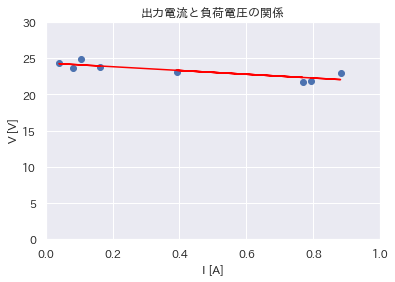

In [8]:
from sklearn import linear_model

# 線形回帰のインスタンス生成
reg = linear_model.LinearRegression()

# 説明変数の設定
x = dataset[['I[A]']].values

# 目的変数の設定
y = dataset[['V[V]']].values

# 回帰分析
reg.fit(x,y)

# 推定結果
Ehat = reg.intercept_[0]
rhat = -reg.coef_[0][0]
print("電源電圧の推定値 E^ = {0:5.2f} [V]".format(Ehat))
print("内部抵抗の推定値 r^ = {0:5.2f} [Ω]".format(rhat))

# 回帰直線をプロット
fig, ax = plt.subplots()
ax.scatter(current_observations,load_voltages)
ax.plot(x,reg.predict(x), color = 'red')
ax.set_title("出力電流と負荷電圧の関係")
ax.set_xlabel("I [A]")
ax.set_ylabel("V [V]")
ax.set_xlim([0,1])
ax.set_ylim([0,30])
ax.grid(True)
plt.show()
